In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
file_path = '/content/nse_tataglobal.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


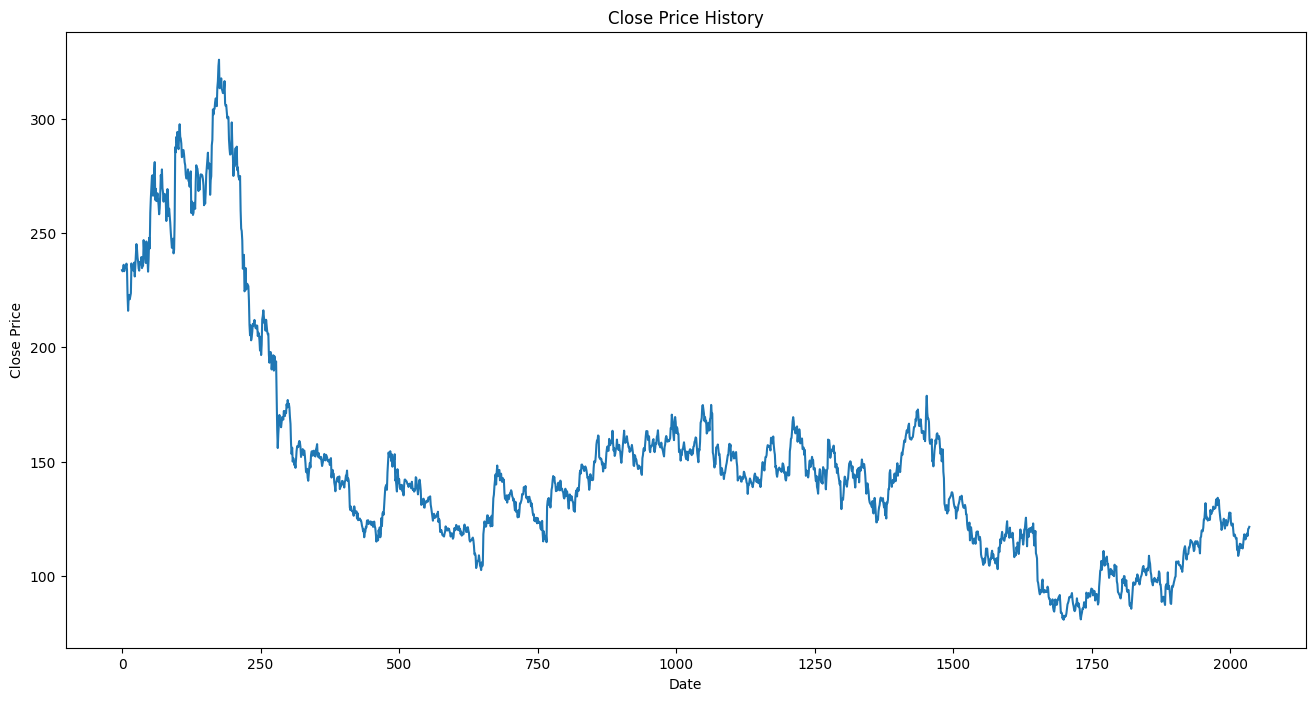

In [5]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price History')
plt.show()

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:
dataset = data['Close'].values
dataset = dataset.reshape(-1, 1)


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
timesteps = 60
X_train = []
y_train = []

In [10]:
for i in range(timesteps, len(scaled_data)):
    X_train.append(scaled_data[i-timesteps:i, 0])
    y_train.append(scaled_data[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

1975/1975 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - loss: 0.0033


In [ ]:
test_data = scaled_data[len(scaled_data) - len(y_train) - timesteps:]

In [ ]:
X_test = []
for i in range(timesteps, len(test_data)):
    X_test.append(test_data[i-timesteps:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

62/62 [==============================] - 2s 16ms/step


In [ ]:
train = data[:len(data) - len(y_train)]
valid = data[len(data) - len(y_train):]
valid['Predictions'] = predictions

<ipython-input-20-a157538c0958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


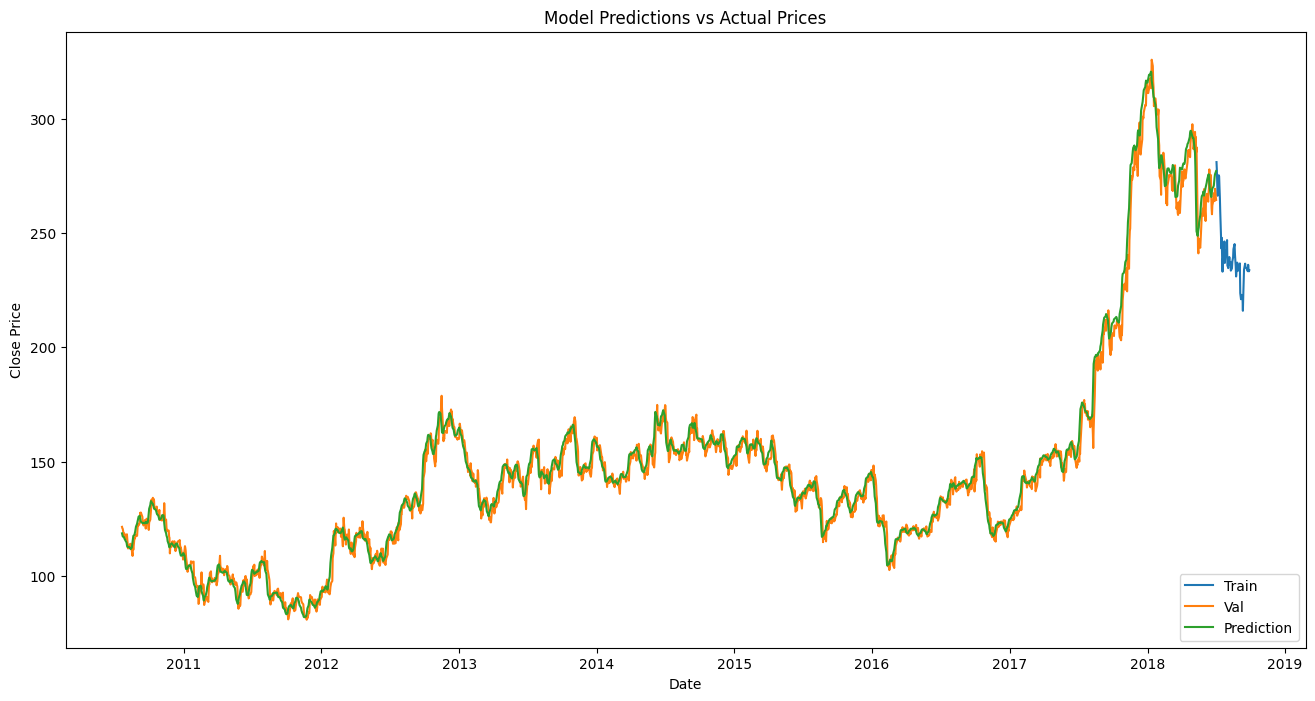

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Model Predictions vs Actual Prices')
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(valid['Close'], valid['Predictions'])
print('Mean Squared Error:', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 25.380692022450276
Root Mean Squared Error: 5.037925368884525
